In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [23]:
## Clustering around KM per liter VS Horsepower
import sys
sys.path.insert(0, '../regression_models/Cleaner.py')
import Cleaner as cl
dataset = cl.get_and_clean_df('../data/bilhandel_unclean.csv')
display(dataset)
features = dataset[['Km/l','Hestekræfter']]

Make Brændstoftype   Gearkasse     Model  Kilometer  Årgang  \
3         Suzuki        Benzin      Manuel     Swift     157000    2009   
4           Opel        Benzin      Manuel  Insignia     129000    2012   
6        Citroën        Diesel      Manuel        C4     158000    2016   
7      Chevrolet        Diesel      Manuel     Cruze      70000    2012   
9       Mercedes        Diesel      Manuel      C200     185000    2015   
...          ...           ...         ...       ...        ...     ...   
19990     Toyota        Diesel      Manuel     Verso      81000    2015   
19993       Audi        Diesel  Automatisk        A6      65000    2018   
19995    Hyundai            El  Automatisk     Ioniq       6000    2020   
19996       Mini        Benzin  Automatisk    Cooper      70000    2016   
19997     Toyota        Diesel      Manuel     HiLux     215000    2007   

      Hestekræfter Antal døre Antal gear  Km/l  0 - 100 km/t  Tophastighed  \
3              102          5          5  16.4          10.0         185.0   
4              140          5          6  12.8          12.2         202.0   
6              100          5          5  32.3          10.7         184.0   
7              163          5          6  17.9           8.5         205.0   
9              136          5          6  23.3          10.1         214.0   
...            ...        ...        ...   ...           ...           ...   
19990          112          5          6  22.2          12.7         185.0   
19993          190          5          7  22.7           8.5         226.0   
19995          120          5          1  80.0           9.9         165.0   
19996          192          5          6  18.5           6.8         230.0   
19997          120          2          5  13.5          13.5         165.0   

          Vægt  Grøn Ejerafgift    Nypris    Pris  
3      975.000             2.52  169990.0   29900  
4        1.538             4.36  346175.0   89900  
6        1.070           260.00  199990.0   99900  
7        1.480             5.54  244995.0   69900  
9        1.545             3.02  568502.0  169700  
...        ...              ...       ...     ...  
19990    1.635             3.88  336363.0  149900  
19993    1.800             3.02  621198.0  364900  
19995    1.475           660.00  275914.0  264700  
19996    1.240             1.28  378320.0    2300  
19997    1.533             7.32  164448.0   99900  

[12009 rows x 16 columns]

In [24]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(features)
centroids = kmeans.cluster_centers_

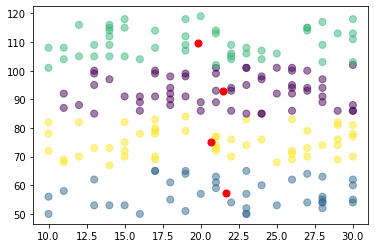

In [94]:
# Plot our data about the cars (KmPerLiter VS Hestekræfter) and the centroids we have found for the clusters
plt.scatter(dataset['Km/l'], dataset['Hestekræfter'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

make  year  newprice  kmperliter      km  horsepower  gearbox  \
1            Dodge  2013    405296          24   43742          76        1   
5             Fiat  2010    407583          28   13039          74        1   
17           Mazda  2000    393222          26  114322          72        0   
35           Dodge  2014    413044          21   14014          77        1   
45      Alfa Romeo  2010    561268          21  171316          74        1   
50          Jaguar  2008    606814          22  182037          76        0   
55       Chevrolet  2012    373260          30   54782          78        0   
56            Fiat  2015    457755          21   90790          72        1   
64           Dodge  2010    646918          27   71409          73        1   
75           Honda  2014    336526          23   30061          74        1   
76          Jaguar  2015    350501          30   27579          77        0   
79           Mazda  2017    543830          25  109887          68        0   
90          Jaguar  2002    530930          29  196359          81        0   
92             BMW  2007    599360          29   86954          76        1   
100         Jaguar  2005    510088          22  171488          70        1   
106           Fiat  2021    639818          30   79532          81        1   
111          Honda  2016    660757          19  187250          79        1   
128          Honda  2003    549307          29   32779          69        1   
133          Honda  2016    439434          30   24560          70        1   
144     Alfa Romeo  2003    494480          29  183415          82        0   
153  Mercedes-Benz  2007    304399          27  114239          79        0   
178          Dodge  2010    395159          21   71103          73        1   
180      Chevrolet  2013    397993          26   66434          69        0   
181          Honda  2019    392046          26  148770          71        0   
184            BMW  2010    647762          21  176835          77        0   
187      Chevrolet  2012    686038          27  133872          70        0   
196           Fiat  2012    470995          29  108857          74        1   

     fueltype  doornumber        price  cluster  
1           1           3  375616.9870        0  
5           1           3  401939.1639        0  
17          0           3  379695.6528        0  
35          1           3  391623.3216        0  
45          1           3  504420.9120        0  
50          0           3  493313.8517        0  
55          0           3  324456.3968        0  
56          0           3  409745.7930        0  
64          1           3  633074.6934        0  
75          0           3  312672.9221        0  
76          0           5  302236.7573        0  
79          1           5  475048.0588        0  
90          0           3  485380.7977        0  
92          1           5  591733.2190        0  
100         0           5  445533.8400        0  
106         1           3  558312.9352        0  
111         0           5  589254.7500        0  
128         1           3  563023.5622        0  
133         1           3  399757.6400        0  
144         1           3  441187.0105        0  
153         1           5  263350.8542        0  
178         0           5  355236.4164        0  
180         1           3  323521.6586        0  
181         1           3  265749.1470        0  
184         1           3  581452.7815        0  
187         1           3  592067.8000        0  
196         0           3  430207.2449        0

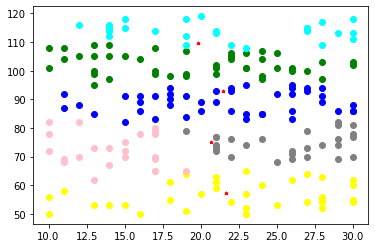

In [98]:
prediction = kmeans.predict(features)
dataset['cluster'] = prediction
cluster_one = dataset[dataset['cluster'] == 0][['Km/l','Hestekræfter']]
cluster_two = dataset[dataset['cluster'] == 1][['Km/l','Hestekræfter']]
cluster_three = dataset[dataset['cluster'] == 2][['Km/l','Hestekræfter']]
cluster_four = dataset[dataset['cluster'] == 3][['Km/l','Hestekræfter']]
cluster_five = dataset[dataset['cluster'] == 4][['Km/l','Hestekræfter']]
cluster_six = dataset[dataset['cluster'] == 5][['Km/l','Hestekræfter']]

plt.scatter(cluster_one['Km/l'], cluster_one['Hestekræfter'], c="grey")
plt.scatter(cluster_two['Km/l'], cluster_two['Hestekræfter'], c="green")
plt.scatter(cluster_three['Km/l'], cluster_three['Hestekræfter'], c="blue")
plt.scatter(cluster_four['Km/l'], cluster_four['Hestekræfter'], c="yellow")
plt.scatter(cluster_five['Km/l'], cluster_five['Hestekræfter'], c="pink")
plt.scatter(cluster_six['Km/l'], cluster_six['Hestekræfter'], c="cyan")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=10, marker='*')

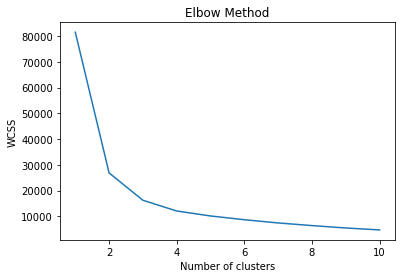

In [96]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

array([1, 0, 1, 2, 1, 0, 2, 5, 1, 5, 1, 5, 1, 2, 2, 4, 4, 0, 4, 3, 4, 3,
       2, 3, 2, 2, 5, 5, 2, 2, 4, 1, 2, 1, 5, 0, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 3, 0, 2, 3, 4, 1, 0, 0, 5, 3, 2, 2, 3, 3, 2, 0, 4,
       1, 5, 2, 1, 5, 1, 1, 1, 4, 0, 0, 3, 2, 0, 4, 1, 3, 3, 4, 3, 2, 4,
       1, 2, 0, 5, 0, 2, 2, 5, 1, 2, 1, 5, 0, 2, 5, 2, 2, 1, 0, 3, 1, 4,
       2, 0, 2, 3, 1, 5, 5, 3, 4, 4, 2, 1, 2, 4, 3, 5, 1, 1, 0, 3, 1, 3,
       3, 0, 1, 3, 1, 4, 3, 4, 1, 2, 2, 3, 0, 3, 2, 4, 5, 3, 1, 2, 1, 0,
       1, 4, 2, 1, 3, 1, 3, 3, 3, 5, 1, 3, 3, 5, 3, 3, 4, 1, 5, 1, 5, 4,
       2, 2, 0, 5, 0, 0, 5, 3, 0, 3, 3, 0, 3, 2, 1, 4, 2, 1, 5, 5, 0, 2,
       4], dtype=int32)

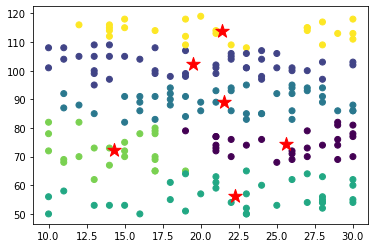

In [97]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(features)
display(pred_y)
plt.scatter(features['Km/l'], features['Hestekræfter'], c=kmeans.labels_.astype('float'))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*')